<a href="https://colab.research.google.com/github/bhermus/CSC732_hw1/blob/main/Problem1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Head of Dataset:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Observations per class: 
 0    762
1    610
Name: class, dtype: int64

Axes(0.729948,0.0602222;0.197892x0.218409)


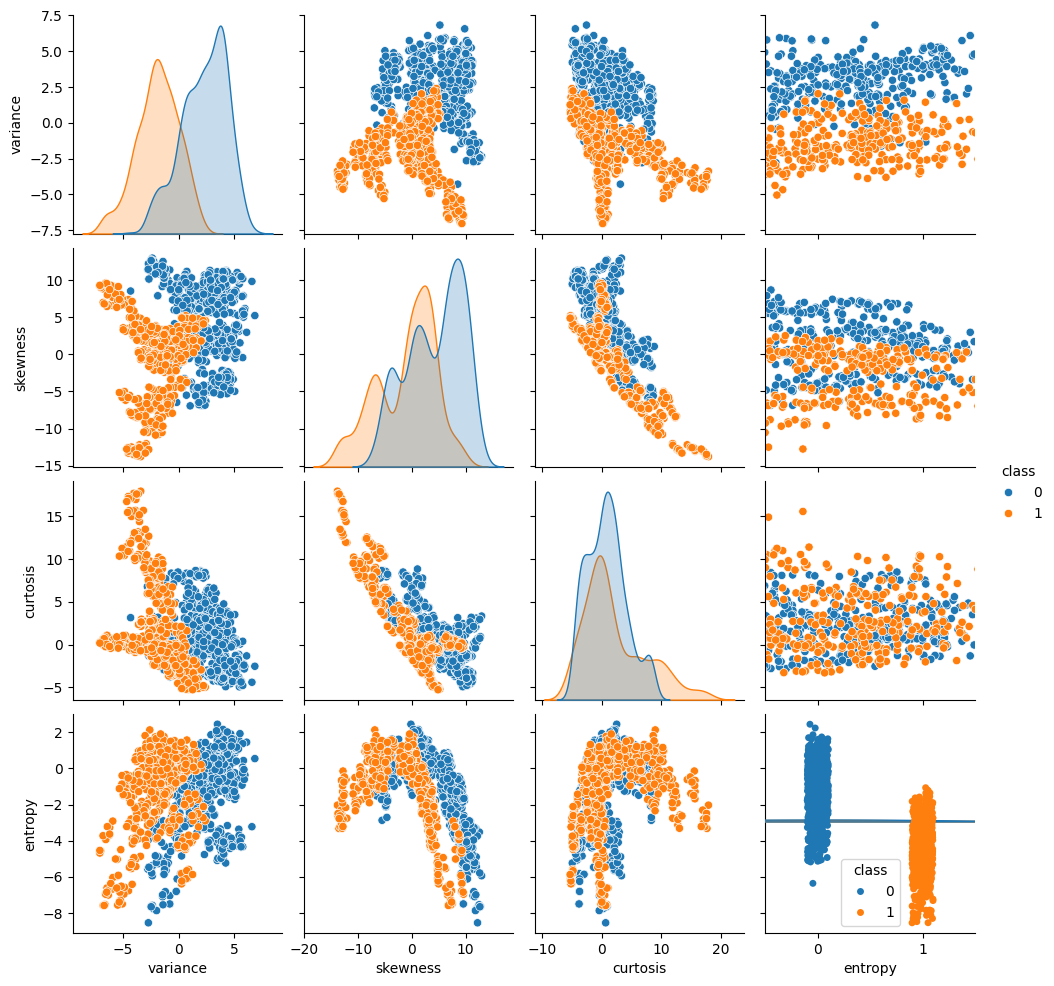

In [3]:
# CSC 732 Hw1 - 1.3
# Ali Necdet Guvercin, Benjamin Hermus, Kehang Wei
# HW1 Part 1.3: Use seaborn for plotting.
# Complete any 4 calculations and plottings using seaborn package

# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset
filename = '/content/BankNote_Authentication.csv'
# names = ['variance','skewness','curtosis', 'entropy', 'class']
dataset = pd.read_csv(filename, delimiter=',')

# Check the head of dataset
print("Head of Dataset:")
print(dataset.head(5)) # Display first 5 records
print()

# Count the number of observations of each class
print('Observations per class: \n', dataset['class'].value_counts())
print()

# Use Seaborn Pairplot and set the hue to be our class
sns.pairplot(dataset, hue='class')
print()



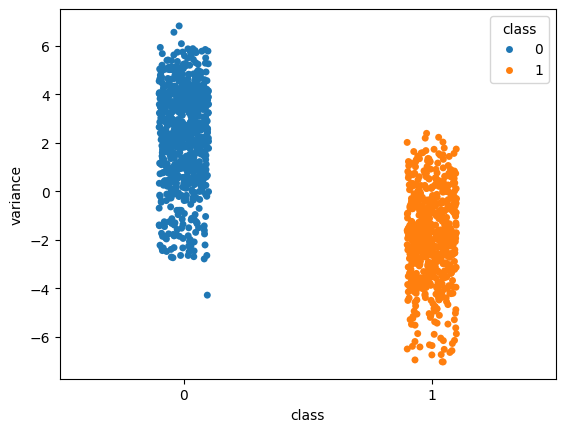

In [4]:
# Seaborn Strip Plot
splot = sns.stripplot(x='class',y='variance',data=dataset,hue='class')
print()

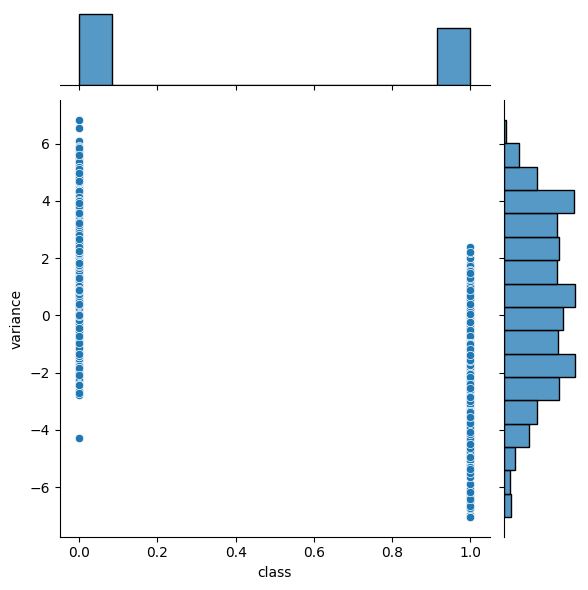

In [5]:
# Seaborn Joint Plot
sns.jointplot(x='class',y='variance',data=dataset)

In [6]:
X=dataset.drop(labels=['class'],axis=1)
y=dataset['class']
print(X.shape, y.shape)
print()

(1372, 4) (1372,)



<Axes: >

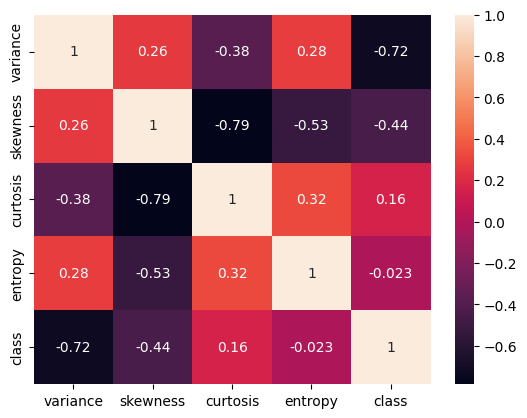

In [7]:
# Correlation Heatmap
heatmp = dataset.corr()
sns.heatmap(heatmp,annot=True)

In [9]:
# Computing the Meanof the Data X and Standarize it for finding PCA
X_standard = X - X.mean()
X_standard

,variance,skewness,curtosis,entropy
0,3.187865,6.743747,-4.204927,0.744667
1,4.112165,6.245047,-3.856227,-0.270443
2,3.432265,-4.560653,0.526573,1.298107
3,3.022865,7.600447,-5.408827,-2.402743
4,-0.104495,-6.377553,3.174173,0.202857
...,...,...,...,...
1367,-0.027595,-0.573153,-2.847727,0.632167
1368,-1.822435,-6.799653,5.079773,1.533447
1369,-4.184035,-15.380953,16.195573,-1.585443
1370,-3.997435,-10.305053,10.995373,-0.090643


In [10]:
# Compute the Covariance of the Data for PCA
dataset_cov = X_standard.cov()
print(dataset.shape)
dataset_cov.head()

(1372, 5)


,variance,skewness,curtosis,entropy
variance,8.081299,4.405083,-4.666323,1.653338
skewness,4.405083,34.445710,-19.905119,-6.490033
curtosis,-4.666323,-19.905119,18.576359,2.887241
entropy,1.653338,-6.490033,2.887241,4.414256


In [11]:
# Compute Eigon Values and Eigon Vectors for PCA
from numpy.linalg import eig
eigvalues, eigvectors = eig(dataset_cov)
print(eigvalues[:10])
print(eigvectors.shape)

[49.88014585  9.2972722   1.94936791  4.39083842]
(4, 4)


In [12]:
# PCA Calculation Using the Dot product of the Eigon vector and standarized columns
X_pca = np.dot(X_standard, eigvectors)
df_pca_calc = pd.DataFrame(X_pca)
df_pca_calc.round(2).head()

,0,1,2,3
0,8.12,2.37,-0.96,1.19
1,7.80,2.69,0.41,1.62
2,-3.69,4.37,1.33,-0.17
3,9.91,0.98,1.59,0.52
4,-6.96,0.73,1.27,-0.48


<ipython-input-17-6afc9f3b2f97>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var)


<Axes: xlabel='variance', ylabel='Density'>

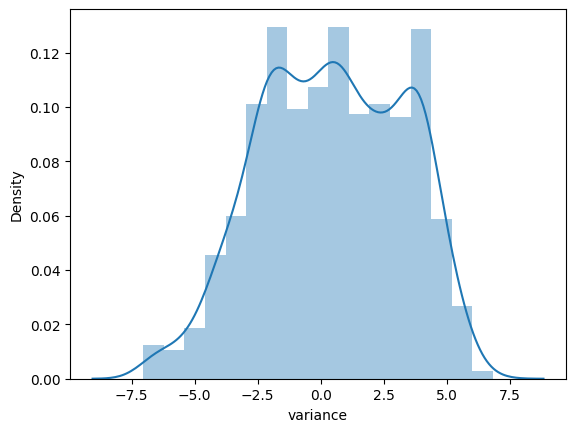

In [17]:
# Distribution Plot
var = dataset.variance
sns.distplot(var)


<ipython-input-18-a211f904ce7e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.curtosis)


<Axes: xlabel='curtosis', ylabel='Density'>

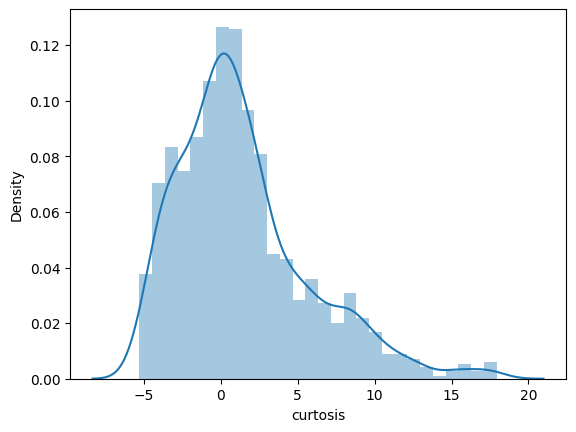

In [18]:
sns.distplot(dataset.curtosis)

<ipython-input-19-6128cf184b42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.entropy)


<Axes: xlabel='entropy', ylabel='Density'>

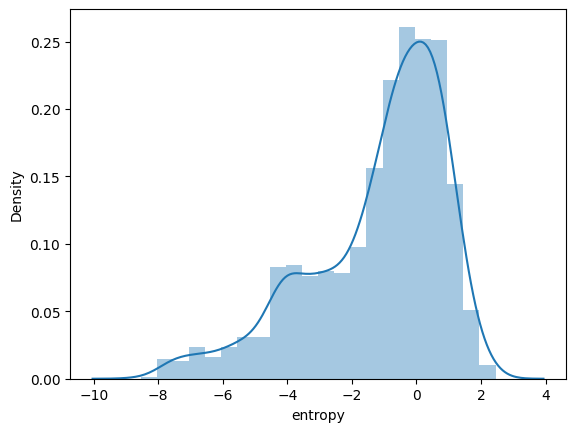

In [19]:
sns.distplot(dataset.entropy)

In [21]:
feat = pd.DataFrame(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat, y, test_size=0.30,stratify=y )
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train,y_train)
prediction = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print (confusion_matrix(y_test,prediction))
print('\n')
print (classification_report(y_test,prediction))
print('\n')
print (accuracy_score(y_test,prediction))
print('\n')
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_train,y_train))) # Training Set
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_test,y_test))) # Testing Set

[[223   6]
 [  3 180]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       229
           1       0.97      0.98      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



0.9781553398058253


Accuracy on training set:1.000
Accuracy on training set:0.978


<Axes: >

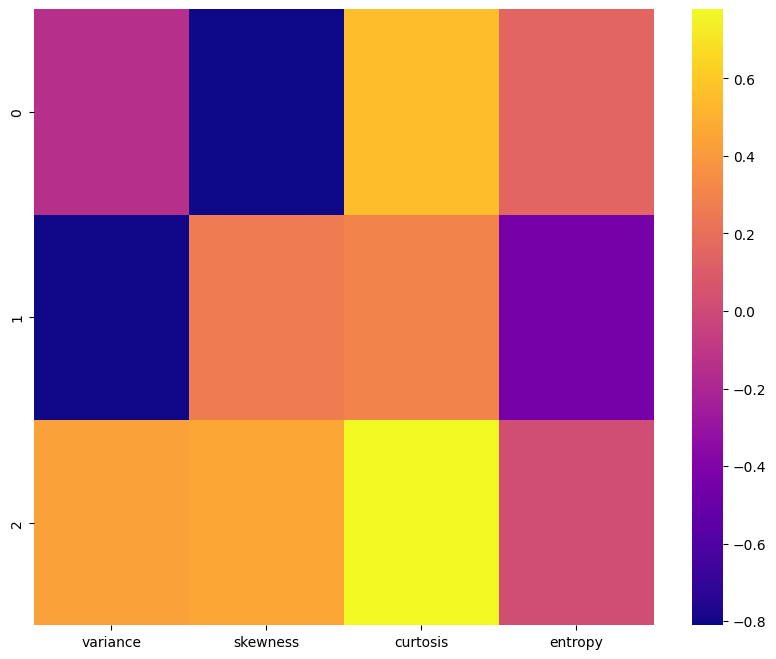

In [43]:
# PCA Implementation
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
x_pca= pca.transform(X)
df_comp = pd.DataFrame(pca.components_,columns=list(X))
plt.figure(figsize=(10,8))
sns.heatmap(df_comp,cmap='plasma')


[Text(0.5, 0, 'Number of Components'), Text(0, 0.5, 'Variance (%)')]

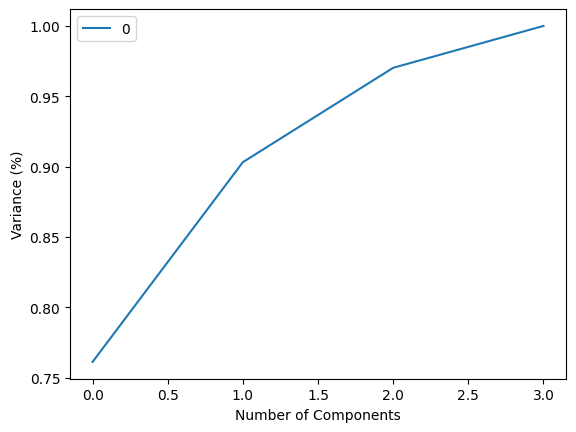

In [54]:
# data_pca = pd.DataFrame(pca.components_, columns=X.columns)
data_pca = pd.DataFrame(data=np.cumsum(pca.explained_variance_ratio_))
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
ax = sns.lineplot(data=data_pca)
ax.set(xlabel="Number of Components", ylabel="Variance (%)")